# Данные

Предположим, что Толя любит авокадо и решил посмотреть динамику цен на данный продукт в США. Имеется следующий набор данных от Hass Avocado Board 🥑:

1. Date — дата
2. AveragePrice — средняя цена одного авокадо
3. Total Volume — количество проданных авокадо
4. 4046 — количество проданных авокадо PLU* 4046
5. 4225 — количество проданных авокадо PLU 4225
6. 4770 — количество проданных авокадо PLU 4770
7. Total Bags — всего упаковок
8. Small Bags — маленькие упаковки
9. Large Bags — большие
10. XLarge Bags — очень большие
11. type — обычный или органический
12. year — год
13. Region — город или регион the city or region of the observation
14. *PLU — код товара (Product Lookup code)


В датафрейме находятся данные не за каждый день, а за конец каждой недели. Для каждой даты есть несколько наблюдений, отличающихся по типу авокадо и региону продажи. 

In [1]:
# импортируем библиотеки

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# загружаем данные
avocado_mean = pd.read_csv("https://stepik.org/media/attachments/lesson/362453/avocado_mean.csv",
                           index_col=0, squeeze=True, parse_dates=['Date'])
avocado_mean.head()

Date
2015-01-04    1.301296
2015-01-11    1.370648
2015-01-18    1.391111
2015-01-25    1.397130
2015-02-01    1.247037
Name: AveragePrice, dtype: float64

In [2]:
#Посчитайте скользящее среднее цены авокадо (AveragePrice) с окном равным 3 (window). 
#Чему равно максимальное значение? 

avocado_mean.rolling(3).mean().max().round(2)

1.85

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/tljh/user/lib/python

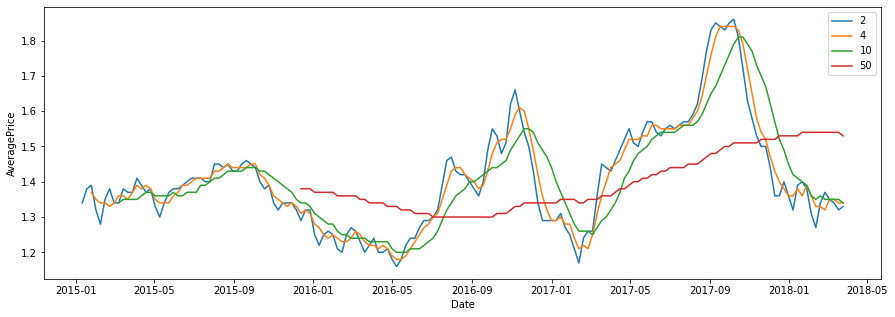

In [8]:
#Ваша задача — построить графики скользящего среднего с разными значениями параметра window (2, 4, 10, 50) и
#посмотреть на изменения графиков

dft_2 = pd.DataFrame(avocado_mean.rolling(2).mean().round(2)).reset_index()
dft_4 = pd.DataFrame(avocado_mean.rolling(4).mean().round(2)).reset_index()
dft_10 = pd.DataFrame(avocado_mean.rolling(10).mean().round(2)).reset_index()
dft_50 = pd.DataFrame(avocado_mean.rolling(50).mean().round(2)).reset_index()

plt.figure(figsize=(15,5))
sns.lineplot(dft_2.Date, dft_2.AveragePrice, label="2")
sns.lineplot(dft_4.Date, dft_4.AveragePrice, label="4")
sns.lineplot(dft_10.Date, dft_10.AveragePrice, label="10")
sns.lineplot(dft_50.Date, dft_50.AveragePrice, label="50")

In [10]:
# Какое будет экспоненциальное скользящее среднее?

avocado_ewm = avocado_mean.ewm(span=2).mean()
avocado_ewm

Date
2015-01-04    1.301296
2015-01-11    1.353310
2015-01-18    1.379480
2015-01-25    1.391394
2015-02-01    1.294758
                ...   
2018-02-25    1.356212
2018-03-04    1.352194
2018-03-11    1.340793
2018-03-18    1.322734
2018-03-25    1.338812
Name: AveragePrice, Length: 169, dtype: float64

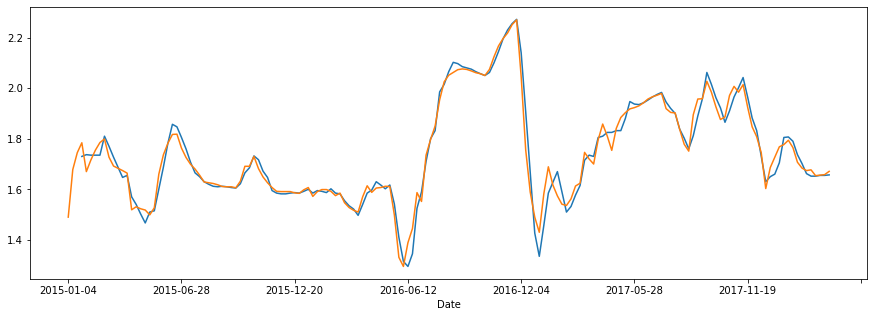

In [13]:
#Для авокадо типа organic (type) в Чикаго (region) посчитайте скользящее среднее с окном 4 
#и экспоненциальное скользящее среднее с параметром span=4. 
#Постройте графики, а затем заполните пропуски. 

# загружаем полные данные
avocado_full = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-evsa-22/lesson_6/avocado_full.csv',index_col=0, sep=',')

# оставляем только нужные данные типа Органик и регион Чикаго
avc_organic = avocado_full.query('type == "organic" and region == "Chicago"')

# скользящее среднее с окном 4
avg = avc_organic.rolling(4).mean().round(3)

# экспоненциальное скользящее среднее с параметром span=4.
exp_avg = avc_organic.ewm(span=4).mean().round(3)

# визуализация
plt.figure(figsize=(15,5))
avg["AveragePrice"].plot()
exp_avg["AveragePrice"].plot()

# Далее будем работать с данными по опозданиям в заключении сделок.

In [19]:
# Загружаем исходные данные

df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-evsa-22/lesson_6/delays.csv',sep=',')
df.head(5)

,client_id,company_id,delay,revenue
0,2389,4240,-1 days -14:57:48.000000000,705436
1,7614,9544,-4 days -02:14:23.000000000,859266
2,2052,2427,-0 days -06:08:57.000000000,812416
3,9635,8054,-0 days -23:40:19.000000000,162312
4,8154,5503,-1 days -13:21:53.000000000,658844


In [20]:
# создаем новую колонку и заменяем знак -
df['delay'] = df.delay.str.replace('-', '')
df['delay'] = pd.to_timedelta(df['delay'])
df.head(5)

,client_id,company_id,delay,revenue
0,2389,4240,1 days 14:57:48,705436
1,7614,9544,4 days 02:14:23,859266
2,2052,2427,0 days 06:08:57,812416
3,9635,8054,0 days 23:40:19,162312
4,8154,5503,1 days 13:21:53,658844


In [22]:
# Разбиваем колонку на 3 интервала 
df['delay_categorical'] = pd.cut(df['delay'], bins=3)
df.head(5)

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
1,7614,9544,4 days 02:14:23,859266,"(3 days 08:05:36.333333333, 4 days 23:51:14]"
2,2052,2427,0 days 06:08:57,812416,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
3,9635,8054,0 days 23:40:19,162312,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
4,8154,5503,1 days 13:21:53,658844,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."


In [23]:
# Пересоздаем колонку delay_categorical, чтобы значения в ней были:

# 'less than 1 day' – время от 0 до 1 дня
# '1-2 days' – от 1 до 2 дней
# '2-3 days' – от 2 до 3 дней
#  'more than 3 days' – больше 3 дней

df['delay_categorical'] = pd.cut(df['delay'], pd.to_timedelta(['0d', '1d', '2d','3d', '10d']), 
                                 labels = ['less than 1 day','1-2 days','2-3 days','more than 3 days'])


df.head()


,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,1-2 days
1,7614,9544,4 days 02:14:23,859266,more than 3 days
2,2052,2427,0 days 06:08:57,812416,less than 1 day
3,9635,8054,0 days 23:40:19,162312,less than 1 day
4,8154,5503,1 days 13:21:53,658844,1-2 days


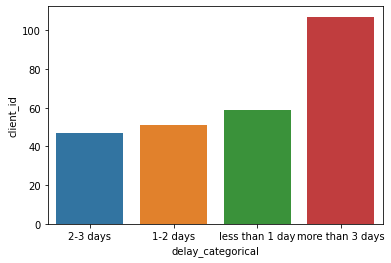

In [31]:
# Строим интерактивный барплот с тем, насколько часто задерживаются сделки. 
# Отсортировываем варианты так, чтобы снизу был самый редкий, а сверху – самый частый.

ax = df.groupby('delay_categorical', as_index=False).agg({'client_id':'count'}).sort_values(by='client_id', ascending=True)
ax
chart = sns.barplot(data=ax, y='client_id', x='delay_categorical', order=ax["delay_categorical"])
chart